In [3]:
import requests
import json

# api-endpoint 
URL = "http://neu-5-1:8088/ws/v1/cluster/scheduler"


# sending get request and saving the response as response object 
r = requests.get(url = URL) 
  
# extracting data in json format 
data = r.json() 

#print(json.dumps(data, indent=4))


{
    "scheduler": {
        "schedulerInfo": {
            "type": "capacityScheduler",
            "capacity": 100.0,
            "usedCapacity": 13.500001,
            "maxCapacity": 100.0,
            "queueName": "root",
            "queues": {
                "queue": [
                    {
                        "type": "capacitySchedulerLeafQueueInfo",
                        "capacity": 100.0,
                        "usedCapacity": 13.500001,
                        "maxCapacity": 100.0,
                        "absoluteCapacity": 100.0,
                        "absoluteMaxCapacity": 100.0,
                        "absoluteUsedCapacity": 13.500001,
                        "numApplications": 1,
                        "queueName": "default",
                        "state": "RUNNING",
                        "resourcesUsed": {
                            "res": {
                                "memory": 27648,
                                "memorySize": 27648,
           

In [12]:
for q in data['scheduler']['schedulerInfo']['queues']['queue']:
    print(q['numActiveApplications'], q['numPendingApplications'], q['numApplications'])

1 0 1


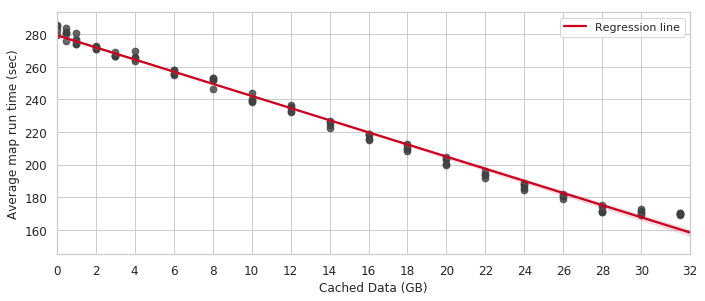

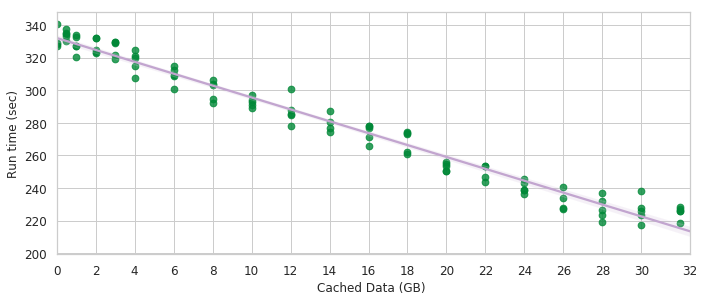

In [49]:
import requests
import json
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math


sns.set(color_codes=True)

def format_xticks(x, pos=None):
    max_cache_file=256
    total_size = 32
    return str(int(total_size*x/max_cache_file))


def process_tasks(data):
    tasks = get_executed_tasks(data['jobid']);
    
    stats = {
    'max_runtime' : 0,
    'min_runtime' : -1,
    'sum_runtime' : 0,
    'n_maps' : 0,
    'avg_runtime': 0}
    
    for t in tasks:
        if t['type'] == 'MAP':
            stats['n_maps'] += 1
            stats['sum_runtime'] += (t['elapsedTime']/1000)
            if t['elapsedTime'] > stats['max_runtime']:
                stats['max_runtime'] = t['elapsedTime']
            elif t['elapsedTime'] < stats['min_runtime'] or stats['min_runtime'] == -1:
                stats['min_runtime'] = t['elapsedTime']
    data['map_avg'] = round(stats['sum_runtime']/stats['n_maps'], 3)            
    data['map_min'] = stats['min_runtime']/1000
    data['map_max'] = stats['max_runtime']/1000
    
    job_info = get_executed_job(data['jobid']);
    data['runtime'] = (job_info['finishTime'] - job_info['startTime'])/1000
    data['queuetime'] = (job_info['startTime'] - job_info['submitTime'])/1000
    
    return data

def get_executed_job(job_id):
    host_name='neu-5-1'
    port=19888
    url = 'http://%s:%d/ws/v1/history/mapreduce/jobs/%s'%(host_name, port, job_id)
    r=requests.get(url)
    return r.json()['job']

def get_executed_tasks(job_id):
    host_name='neu-5-1'
    port=19888
    url = 'http://%s:%d/ws/v1/history/mapreduce/jobs/%s/tasks'%(host_name, port, job_id)
    r=requests.get(url)
    return r.json()['tasks']['task']

#job_id = 'job_1588104563002_0009'
#job_stats = process_tasks(job_id)
#jobid = 'job_1588104563002_0002'

#get_job_execution(jobid


sns.set_style("whitegrid")

#print(json.dumps(job_stats, indent=2))
fig, ax = plt.subplots(figsize=(10,4))
#jobs = pd.read_csv('jobs.csv')
jobs = pd.read_csv('/local0/Kariz/expriments/microbenchmark/terasor_1gbps.csv')
jobs = jobs.apply(process_tasks, axis=1)

#print(jobs)
#concatenated = pd.concat([jobs, jobs2])

#sns.regplot(ax=ax, x='cacheddata', y = 'map_avg' , data=jobs2,
#            scatter_kws={'color':'#404040'},
#            line_kws={'color': '#ca0020'})
strides = [0, 16, 32, 48, 64, 80, 96, 112, 128,
           144, 160, 176, 192, 208, 224, 240, 260]


sns.regplot(ax=ax, x='cacheddata', y = 'map_avg' , data=jobs,
            scatter_kws={'s': 45, 'color':'#404040', 'label':'experiment'},
            line_kws={'color': '#ca0020', 'label':'Regression line'})
ax.set_xlim(0, 256)
#ax.set_ylim(0, 300)
ax.set_xticks(strides)
ax.set_xlabel("Cached Data (GB)")
ax.set_ylabel("Average map run time (sec)")
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.98, top=0.97)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partial_maptime_terasort_1gbs.pdf', format='pdf', dpi=200)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partial_maptime_terasort_1gbs.png', format='png', dpi=200)
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
sns.regplot(ax=ax, x='cacheddata', y = 'runtime' , data=jobs,
            scatter_kws={'s': 45, 'color':'#008837', 'label':'experiment'},
            line_kws={'color': '#c2a5cf', 'label':'Regression line'})
ax.set_xlim(0, 256)
#ax.set_ylim(0, 350)
ax.set_xticks(strides)
ax.set_xlabel("Cached Data (GB) ")
ax.set_ylabel("Run time (sec)")

ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.98, top=0.97)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partial_runtime_terasort_1gbs.pdf', format='pdf', dpi=200)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partial_runtime_terasort_1gbs.png', format='png', dpi=200)
plt.show()

#jobs


In [47]:
jobs.to_csv('resultsterasort.csv')

In [102]:
'http://rm-http-address:port/ws/v1/cluster/apps?states=running'

def get_running_applications():
    host_name='neu-5-1'
    port=8088
    url = 'http://%s:%d/ws/v1/cluster/apps?states=running'%(host_name, port)
    headers = {'Accept':'application/json'}
    
    r=requests.get(url, headers=headers)
    
    return r.json()['apps']['app'] if r.json()['apps'] else []

running_apps = get_running_applications()

for app in running_apps:
    job_id = app['id'].replace('application', 'job')
    print(job_id)

job_1588104563002_0022


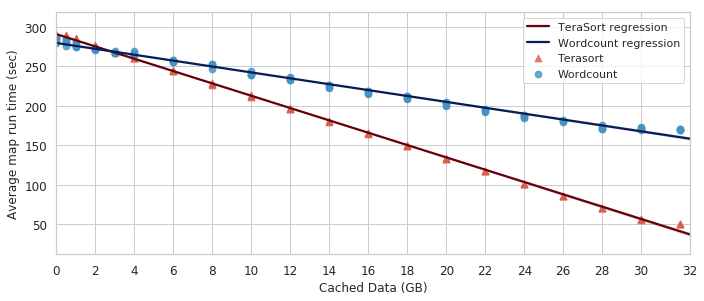

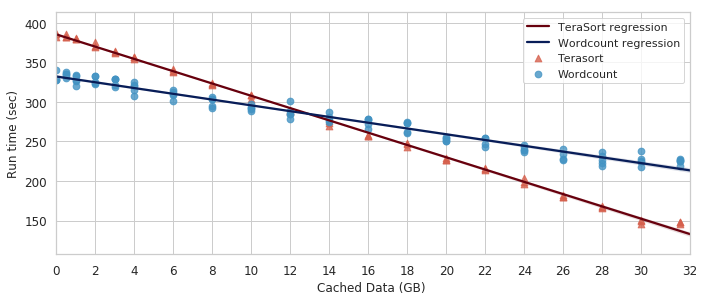

In [45]:
import requests
import json
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math


sns.set(color_codes=True)

def format_xticks(x, pos=None):
    max_cache_file=256
    total_size = 32
    return str(int(total_size*x/max_cache_file))


def process_tasks(data):
    tasks = get_executed_tasks(data['jobid']);
    
    stats = {
    'max_runtime' : 0,
    'min_runtime' : -1,
    'sum_runtime' : 0,
    'n_maps' : 0,
    'avg_runtime': 0}
    
    for t in tasks:
        if t['type'] == 'MAP':
            stats['n_maps'] += 1
            stats['sum_runtime'] += (t['elapsedTime']/1000)
            if t['elapsedTime'] > stats['max_runtime']:
                stats['max_runtime'] = t['elapsedTime']
            elif t['elapsedTime'] < stats['min_runtime'] or stats['min_runtime'] == -1:
                stats['min_runtime'] = t['elapsedTime']
    data['map_avg'] = round(stats['sum_runtime']/stats['n_maps'], 3)            
    data['map_min'] = stats['min_runtime']/1000
    data['map_max'] = stats['max_runtime']/1000
    
    job_info = get_executed_job(data['jobid']);
    data['runtime'] = (job_info['finishTime'] - job_info['startTime'])/1000
    data['queuetime'] = (job_info['startTime'] - job_info['submitTime'])/1000
    
    return data

def get_executed_job(job_id):
    host_name='neu-5-1'
    port=19888
    url = 'http://%s:%d/ws/v1/history/mapreduce/jobs/%s'%(host_name, port, job_id)
    r=requests.get(url)
    return r.json()['job']

def get_executed_tasks(job_id):
    host_name='neu-5-1'
    port=19888
    url = 'http://%s:%d/ws/v1/history/mapreduce/jobs/%s/tasks'%(host_name, port, job_id)
    r=requests.get(url)
    return r.json()['tasks']['task']

#job_id = 'job_1588104563002_0009'
#job_stats = process_tasks(job_id)
#jobid = 'job_1588104563002_0002'

#get_job_execution(jobid


sns.set_style("whitegrid")

#print(json.dumps(job_stats, indent=2))
fig, ax = plt.subplots(figsize=(10,4))
#jobs = pd.read_csv('jobs.csv')
jobs = pd.read_csv('/local0/Kariz/expriments/microbenchmark/terasor_1gbps.csv')
jobs = jobs.apply(process_tasks, axis=1)

jobs2 = pd.read_csv('resultswordcountkeepit.csv')

#print(jobs2)
#concatenated = pd.concat([jobs, jobs2])

#sns.regplot(ax=ax, x='cacheddata', y = 'map_avg' , data=jobs2,
#            scatter_kws={'color':'#404040'},
#            line_kws={'color': '#ca0020'})
strides = [0, 16, 32, 48, 64, 80, 96, 112, 128,
           144, 160, 176, 192, 208, 224, 240, 260]


sns.regplot(ax=ax, x='cacheddata', y = 'map_avg' , data=jobs, label='Terasort', marker="^",
            scatter_kws={'s': 45, 'color':'#d6604d', 'label':'Terasort'},
            line_kws={'color': '#67000d', 'label':'TeraSort regression'})


sns.regplot(ax=ax, x='cacheddata', y = 'map_avg' , data=jobs2, label='Wordcount', marker="o",
            scatter_kws={'s': 45, 'color':'#4393c3', 'label':'Word count'},
            line_kws={'color': '#081d58', 'label':'Wordcount regression'})

ax.set_xlim(0, 256)
#ax.set_ylim(0, 300)
ax.set_xticks(strides)
ax.set_xlabel("Cached Data (GB)")
ax.set_ylabel("Average map run time (sec)")
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.98, top=0.97)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partialslope_maptime_teraswc_1gbs.pdf', format='pdf', dpi=200)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partialslope_maptime_teraswc_1gbs.png', format='png', dpi=200)
plt.show()

fig, ax = plt.subplots(figsize=(10,4))

sns.regplot(ax=ax, x='cacheddata', y = 'runtime' , data=jobs, label='Terasort', marker="^",
            scatter_kws={'s': 45, 'color':'#d6604d', 'label':'Terasort'},
            line_kws={'color': '#67000d', 'label':'TeraSort regression'})


sns.regplot(ax=ax, x='cacheddata', y = 'runtime' , data=jobs2, label='Wordcount', marker="o",
            scatter_kws={'s': 45, 'color':'#4393c3', 'label':'Word count'},
            line_kws={'color': '#081d58', 'label':'Wordcount regression'})

ax.set_xlim(0, 256)
#ax.set_ylim(0, 350)
ax.set_xticks(strides)
ax.set_xlabel("Cached Data (GB) ")
ax.set_ylabel("Run time (sec)")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.legend()
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.98, top=0.97)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partialslope_runtime_teraswc_1gbs.pdf', format='pdf', dpi=200)
plt.savefig('/local0/papers/KARIZ/long/Figures/fig_partialslope_runtime_teraswc_1gbs.png', format='png', dpi=200)
plt.show()

#jobs
